In [10]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from data2 import polyvore_dataset
from utils import Config
import tensorflow.keras as tfk
import tensorflow as tf
tf.test.is_gpu_available()

True

In [11]:
# data generators
dataset = polyvore_dataset()
trainList, valList, nClass = dataset.readMeta()
if Config['debug']:
    trainList = trainList[:100]
    valList = valList[:100]
trainData = dataset.load(trainList, batchSize=Config['batch_size'])
valData = dataset.load(valList, batchSize=Config['batch_size'])

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(rate=0.1)(x)
predictions = Dense(nClass, activation = 'softmax' )(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [16]:
# build model
checkpoint_path = "training/MobileNet.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
earlyStop = tf.keras.callbacks.EarlyStopping(patience=3)

tf.keras.optimizers.schedules.ExponentialDecay(
    1e-3, decay_steps=2000*40, decay_rate=0.5, staircase=True)
optimizer = tfk.optimizers.Adam(1e-3)
    # define optimizers
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
    # training - num worker is obsolete now
history = model.fit(trainData, validation_data=valData, epochs=150,
              steps_per_epoch=2000, validation_steps = 300,
              callbacks=[cp_callback]) 

Train for 2000 steps, validate for 300 steps
Epoch 1/150
1999/2000 [============================>.] - ETA: 0s - loss: 2.7820 - accuracy: 0.2781
Epoch 00001: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 121s 61ms/step - loss: 2.7818 - accuracy: 0.2781 - val_loss: 2.5790 - val_accuracy: 0.3304
Epoch 2/150
1999/2000 [============================>.] - ETA: 0s - loss: 2.5330 - accuracy: 0.3311
Epoch 00002: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 2.5329 - accuracy: 0.3311 - val_loss: 2.7168 - val_accuracy: 0.2875
Epoch 3/150
1999/2000 [============================>.] - ETA: 0s - loss: 2.3297 - accuracy: 0.3771
Epoch 00003: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 125s 62ms/step - loss: 2.3301 - accuracy: 0.3771 - val_loss: 2.2360 - val_accuracy: 0.3938
Epoch 4/150
1999/2000 [============================>.] - ETA: 0s - loss: 2.2093 - accuracy:

1999/2000 [============================>.] - ETA: 0s - loss: 1.4600 - accuracy: 0.5875
Epoch 00029: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.4599 - accuracy: 0.5876 - val_loss: 1.3902 - val_accuracy: 0.5892
Epoch 30/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.4386 - accuracy: 0.5867
Epoch 00030: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.4386 - accuracy: 0.5867 - val_loss: 1.4437 - val_accuracy: 0.5846
Epoch 31/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.4562 - accuracy: 0.5884
Epoch 00031: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.4560 - accuracy: 0.5884 - val_loss: 1.4120 - val_accuracy: 0.5958
Epoch 32/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.4494 - accuracy: 0.5832
Epoch 00032: saving model to training/MobileNe

1999/2000 [============================>.] - ETA: 0s - loss: 1.2303 - accuracy: 0.6346
Epoch 00057: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.2304 - accuracy: 0.6344 - val_loss: 1.2780 - val_accuracy: 0.6271
Epoch 58/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.2126 - accuracy: 0.6376
Epoch 00058: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.2126 - accuracy: 0.6376 - val_loss: 1.3094 - val_accuracy: 0.6204
Epoch 59/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.2152 - accuracy: 0.6390
Epoch 00059: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.2152 - accuracy: 0.6389 - val_loss: 1.3354 - val_accuracy: 0.6083
Epoch 60/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.2047 - accuracy: 0.6393
Epoch 00060: saving model to training/MobileNe

1999/2000 [============================>.] - ETA: 0s - loss: 1.0637 - accuracy: 0.6723 ETA: 0s - loss: 1.0638 - accu
Epoch 00085: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.0636 - accuracy: 0.6723 - val_loss: 1.2954 - val_accuracy: 0.6233
Epoch 86/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.0598 - accuracy: 0.6745
Epoch 00086: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 123s 62ms/step - loss: 1.0597 - accuracy: 0.6746 - val_loss: 1.3301 - val_accuracy: 0.6192
Epoch 87/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.0352 - accuracy: 0.6815
Epoch 00087: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 1.0351 - accuracy: 0.6814 - val_loss: 1.2326 - val_accuracy: 0.6421
Epoch 88/150
1999/2000 [============================>.] - ETA: 0s - loss: 1.0550 - accuracy: 0.6783
Epoch 00088: sav

1999/2000 [============================>.] - ETA: 0s - loss: 0.9345 - accuracy: 0.7059
Epoch 00113: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 0.9345 - accuracy: 0.7059 - val_loss: 1.2829 - val_accuracy: 0.6367
Epoch 114/150
1999/2000 [============================>.] - ETA: 0s - loss: 0.9342 - accuracy: 0.7040
Epoch 00114: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 0.9342 - accuracy: 0.7039 - val_loss: 1.3800 - val_accuracy: 0.6329
Epoch 115/150
1999/2000 [============================>.] - ETA: 0s - loss: 0.9384 - accuracy: 0.6970
Epoch 00115: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 123s 62ms/step - loss: 0.9383 - accuracy: 0.6971 - val_loss: 1.3125 - val_accuracy: 0.6433
Epoch 116/150
1999/2000 [============================>.] - ETA: 0s - loss: 0.9153 - accuracy: 0.7088
Epoch 00116: saving model to training/Mobil

1999/2000 [============================>.] - ETA: 0s - loss: 0.8309 - accuracy: 0.7286
Epoch 00141: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 124s 62ms/step - loss: 0.8309 - accuracy: 0.7286 - val_loss: 1.4968 - val_accuracy: 0.6300
Epoch 142/150
1999/2000 [============================>.] - ETA: 0s - loss: 0.8444 - accuracy: 0.7282
Epoch 00142: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 123s 62ms/step - loss: 0.8442 - accuracy: 0.7283 - val_loss: 1.3486 - val_accuracy: 0.6446
Epoch 143/150
1999/2000 [============================>.] - ETA: 0s - loss: 0.8268 - accuracy: 0.7344
Epoch 00143: saving model to training/MobileNet.ckpt
2000/2000 [==============================] - 123s 62ms/step - loss: 0.8269 - accuracy: 0.7343 - val_loss: 1.3408 - val_accuracy: 0.6375
Epoch 144/150
1999/2000 [============================>.] - ETA: 0s - loss: 0.8354 - accuracy: 0.7302
Epoch 00144: saving model to training/Mobil

In [20]:
record = history.history
import json
toJson = {}
for key in record:
    toJson[key] = [float(val) for val in record[key]]
with open('mobileNet150.json', 'w') as out:
    json.dump(toJson, out)

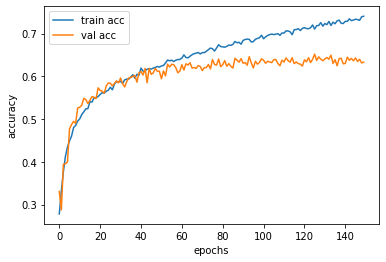

In [21]:
import matplotlib.pyplot as plt 
record = history.history
loss, valLoss, acc, valAcc = record['loss'], record['val_loss'], record['accuracy'], record['val_accuracy'] 
plt.plot(acc, label='train acc')
plt.plot(valAcc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [5]:
Config['num_epochs']

100